## Imports

In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/semcovici/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Read Data

In [3]:
path_raw_data = '../data/raw/'

In [4]:
data = pd.read_csv(
    path_raw_data + 'train_r2_bo_top_mentioned_timelines.csv', 
    sep = ';', 
    encoding='utf-8-sig'
    )

In [5]:
data

,User_ID,Polarity,Texts
0,r2_bo_1,for,Saudadinhaa dl :/ # Gente que beija com mordid...
1,r2_bo_1,against,Saudadinhaa dl :/ # Gente que beija com mordid...
2,r2_bo_1,against,Saudadinhaa dl :/ # Gente que beija com mordid...
3,r2_bo_3,for,"@Gremio E que domínio, hein campeão? # @Analis..."
4,r2_bo_3,for,"@Gremio E que domínio, hein campeão? # @Analis..."
...,...,...,...
7055,r2_bo_756,against,"Villas Boas manobra para não fazer de Mourão ""..."
7056,r2_bo_756,against,"Villas Boas manobra para não fazer de Mourão ""..."
7057,r2_bo_756,against,"Villas Boas manobra para não fazer de Mourão ""..."
7058,r2_bo_756,against,"Villas Boas manobra para não fazer de Mourão ""..."


## analysis

### Basic describe

In [6]:
#number of observations per label
data.Polarity.value_counts()

Polarity
against    4173
for        2887
Name: count, dtype: int64

In [7]:
print('len data with nan: ', data.shape)
print('len data without nan: ', data.dropna().shape)

len data with nan:  (7060, 3)
len data without nan:  (7060, 3)


In [8]:
print('len data with duplicates: ', data.shape)
print('len data without duplicates: ', data.drop_duplicates().shape)

len data with duplicates:  (7060, 3)
len data without duplicates:  (782, 3)


In [9]:
print('len data with duplicates: ', data['Texts'].shape)
print('len data without duplicates: ', data['Texts'].drop_duplicates().shape)

len data with duplicates:  (7060,)
len data without duplicates:  (471,)


In [10]:
data_2_anl = data.drop_duplicates(subset=['Texts'])
data_2_anl

,User_ID,Polarity,Texts
0,r2_bo_1,for,Saudadinhaa dl :/ # Gente que beija com mordid...
3,r2_bo_3,for,"@Gremio E que domínio, hein campeão? # @Analis..."
24,r2_bo_5,for,"@This_IsK Hahahaha olha, salada caesar é fácil..."
30,r2_bo_7,against,@Chiico_Sant vai passar aqui ou quer que eu vá...
32,r2_bo_8,against,"@gabycunha86 Amanhã vou aí, deixa pra terça # ..."
...,...,...,...
5984,r2_bo_720,against,"Pesquisa mostra que, além do Brasil, apenas Rú..."
6820,r2_bo_740,for,"eu odeio trânsito com todas minhas forças, vai..."
6825,r2_bo_743,against,A rainha do pop está de volta. Madonna lançou ...
6983,r2_bo_751,for,@toko_tkd Indo # @toko_tkd Demorou pra respond...


In [11]:
#number of observations per label
data_2_anl.Polarity.value_counts()

Polarity
against    429
for         42
Name: count, dtype: int64

### numerical analysis of length of texts

In [12]:
data_2_anl['list_texts'] = data_2_anl.Texts.progress_apply(lambda x: x.split(' # '))
data_2_anl.head()

100%|██████████| 471/471 [00:00<00:00, 1921.66it/s]
/tmp/ipykernel_160056/2679191039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_anl['list_texts'] = data_2_anl.Texts.progress_apply(lambda x: x.split(' # '))


,User_ID,Polarity,Texts,list_texts
0,r2_bo_1,for,Saudadinhaa dl :/ # Gente que beija com mordid...,"[Saudadinhaa dl :/, Gente que beija com mordid..."
3,r2_bo_3,for,"@Gremio E que domínio, hein campeão? # @Analis...","[@Gremio E que domínio, hein campeão?, @Analis..."
24,r2_bo_5,for,"@This_IsK Hahahaha olha, salada caesar é fácil...","[@This_IsK Hahahaha olha, salada caesar é fáci..."
30,r2_bo_7,against,@Chiico_Sant vai passar aqui ou quer que eu vá...,[@Chiico_Sant vai passar aqui ou quer que eu v...
32,r2_bo_8,against,"@gabycunha86 Amanhã vou aí, deixa pra terça # ...","[@gabycunha86 Amanhã vou aí, deixa pra terça, ..."


In [13]:
data_2_anl['n_texts'] = data_2_anl.list_texts.progress_apply(lambda x: len(x))
data_2_anl.head()

100%|██████████| 471/471 [00:00<00:00, 690981.88it/s]
/tmp/ipykernel_160056/3192377978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_anl['n_texts'] = data_2_anl.list_texts.progress_apply(lambda x: len(x))


,User_ID,Polarity,Texts,list_texts,n_texts
0,r2_bo_1,for,Saudadinhaa dl :/ # Gente que beija com mordid...,"[Saudadinhaa dl :/, Gente que beija com mordid...",1370
3,r2_bo_3,for,"@Gremio E que domínio, hein campeão? # @Analis...","[@Gremio E que domínio, hein campeão?, @Analis...",2969
24,r2_bo_5,for,"@This_IsK Hahahaha olha, salada caesar é fácil...","[@This_IsK Hahahaha olha, salada caesar é fáci...",2250
30,r2_bo_7,against,@Chiico_Sant vai passar aqui ou quer que eu vá...,[@Chiico_Sant vai passar aqui ou quer que eu v...,1574
32,r2_bo_8,against,"@gabycunha86 Amanhã vou aí, deixa pra terça # ...","[@gabycunha86 Amanhã vou aí, deixa pra terça, ...",956


In [14]:
data_2_anl['list_texts_tokens'] = data_2_anl.list_texts.progress_apply(lambda x: [word_tokenize(text, language='portuguese') for text in x])
data_2_anl.head()

100%|██████████| 471/471 [01:02<00:00,  7.51it/s]
/tmp/ipykernel_160056/2111050499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_anl['list_texts_tokens'] = data_2_anl.list_texts.progress_apply(lambda x: [word_tokenize(text, language='portuguese') for text in x])


,User_ID,Polarity,Texts,list_texts,n_texts,list_texts_tokens
0,r2_bo_1,for,Saudadinhaa dl :/ # Gente que beija com mordid...,"[Saudadinhaa dl :/, Gente que beija com mordid...",1370,"[[Saudadinhaa, dl, :, /], [Gente, que, beija, ..."
3,r2_bo_3,for,"@Gremio E que domínio, hein campeão? # @Analis...","[@Gremio E que domínio, hein campeão?, @Analis...",2969,"[[@, Gremio, E, que, domínio, ,, hein, campeão..."
24,r2_bo_5,for,"@This_IsK Hahahaha olha, salada caesar é fácil...","[@This_IsK Hahahaha olha, salada caesar é fáci...",2250,"[[@, This_IsK, Hahahaha, olha, ,, salada, caes..."
30,r2_bo_7,against,@Chiico_Sant vai passar aqui ou quer que eu vá...,[@Chiico_Sant vai passar aqui ou quer que eu v...,1574,"[[@, Chiico_Sant, vai, passar, aqui, ou, quer,..."
32,r2_bo_8,against,"@gabycunha86 Amanhã vou aí, deixa pra terça # ...","[@gabycunha86 Amanhã vou aí, deixa pra terça, ...",956,"[[@, gabycunha86, Amanhã, vou, aí, ,, deixa, p..."


In [15]:
data_2_anl['list_texts_len'] = data_2_anl.list_texts_tokens.progress_apply(lambda x: [len(text) for text in x])
data_2_anl.head()

100%|██████████| 471/471 [00:00<00:00, 8669.42it/s]
/tmp/ipykernel_160056/3480478351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_anl['list_texts_len'] = data_2_anl.list_texts_tokens.progress_apply(lambda x: [len(text) for text in x])


,User_ID,Polarity,Texts,list_texts,n_texts,list_texts_tokens,list_texts_len
0,r2_bo_1,for,Saudadinhaa dl :/ # Gente que beija com mordid...,"[Saudadinhaa dl :/, Gente que beija com mordid...",1370,"[[Saudadinhaa, dl, :, /], [Gente, que, beija, ...","[4, 7, 10, 6, 5, 8, 12, 1, 6, 2, 10, 4, 2, 4, ..."
3,r2_bo_3,for,"@Gremio E que domínio, hein campeão? # @Analis...","[@Gremio E que domínio, hein campeão?, @Analis...",2969,"[[@, Gremio, E, que, domínio, ,, hein, campeão...","[9, 14, 10, 6, 27, 11, 10, 8, 21, 11, 8, 23, 1..."
24,r2_bo_5,for,"@This_IsK Hahahaha olha, salada caesar é fácil...","[@This_IsK Hahahaha olha, salada caesar é fáci...",2250,"[[@, This_IsK, Hahahaha, olha, ,, salada, caes...","[50, 22, 55, 44, 23, 33, 17, 41, 3, 17, 16, 43..."
30,r2_bo_7,against,@Chiico_Sant vai passar aqui ou quer que eu vá...,[@Chiico_Sant vai passar aqui ou quer que eu v...,1574,"[[@, Chiico_Sant, vai, passar, aqui, ou, quer,...","[17, 17, 8, 5, 7, 7, 14, 13, 6, 7, 10, 5, 16, ..."
32,r2_bo_8,against,"@gabycunha86 Amanhã vou aí, deixa pra terça # ...","[@gabycunha86 Amanhã vou aí, deixa pra terça, ...",956,"[[@, gabycunha86, Amanhã, vou, aí, ,, deixa, p...","[9, 5, 11, 4, 12, 13, 2, 25, 10, 7, 12, 5, 7, ..."


[Text(0.5, 1.0, 'number of comments of friends per user'),
 Text(0.5, 0, 'number of comments')]

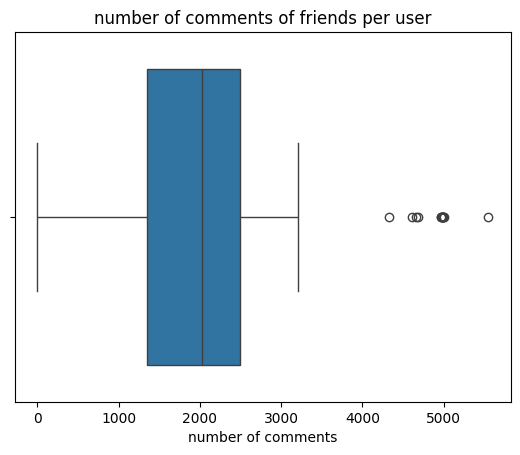

In [16]:
sns.boxplot(
    data=data_2_anl,
    x="n_texts"
    ).set(
        title='number of comments of friends per user',
        xlabel='number of comments'
    )

[Text(0.5, 1.0, 'number of comments of friends per user'),
 Text(0.5, 0, 'number of comments')]

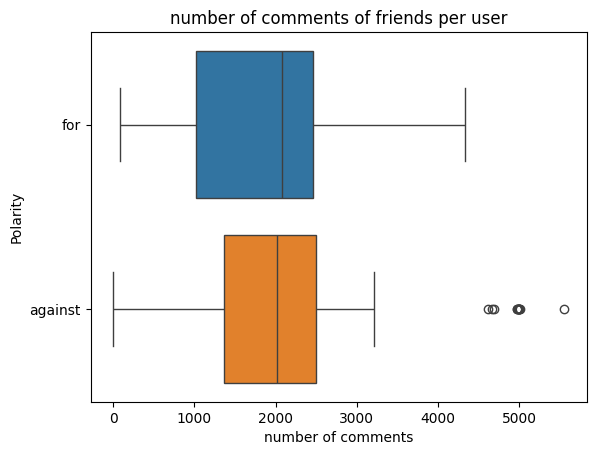

In [17]:
sns.boxplot(
    data=data_2_anl,
    x="n_texts",
    y='Polarity',
    hue='Polarity'
    ).set(
        title='number of comments of friends per user',
        xlabel='number of comments'
    )

In [18]:
list_for_n_tks = []
list_against_n_tks = []
for idx, row in tqdm(data_2_anl.iterrows(), total = len(data_2_anl)):
    
    label = row['Polarity']
    list_texts_len = row['list_texts_len']
    
    if label == 'for':
        list_for_n_tks += list_texts_len
    elif label == 'against':
        list_against_n_tks += list_texts_len

100%|██████████| 471/471 [00:00<00:00, 17007.16it/s]


[Text(0.5, 1.0, 'number of token in comments by polarity'),
 Text(0.5, 0, 'number of tokens')]

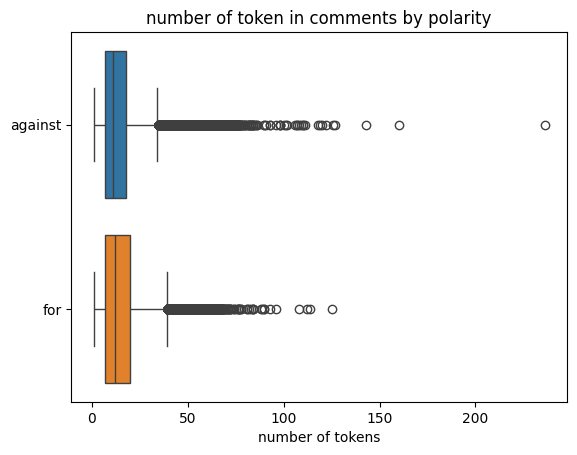

In [19]:
sns.boxplot(
    data={'against': list_against_n_tks, 'for': list_for_n_tks},
    orient = 'h',
    ).set(
        title='number of token in comments by polarity',
        xlabel='number of tokens'
    )